In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import IPython.display as ipd
from torch.utils.data import Dataset, DataLoader
from mlp import *
from layers import *
from losses import *
from digits import *

### Data Loader

In [3]:
class Digits(Dataset):
    def __init__(self, X, Y):
        # convert ys to one hot vectors
        ys = []
        for y in Y:
            ys.append(np.zeros(10))
            ys[-1][y] = 1
        self.digits = []
        for x, y in zip(X, ys):
            self.digits.append((x, y))
            
    def __len__(self):
        return len(self.digits)
    
    def __getitem__(self, i):
        return self.digits[i]
    
X, Y = get_digits("Digits")
training = Digits(X, Y)

### Architecture

In [4]:
encoder = MLP(784, squared_loss_deriv)
encoder.add_layer(512, leaky_relu, leaky_relu_deriv)
encoder.add_layer(256, leaky_relu, leaky_relu_deriv)
encoder.add_layer(128, leaky_relu, leaky_relu_deriv)
encoder.add_layer(2, logistic, logistic_deriv, "latent")
encoder.add_layer(128, leaky_relu, leaky_relu_deriv, "up128")
encoder.add_layer(256, leaky_relu, leaky_relu_deriv)
encoder.add_layer(512, leaky_relu, leaky_relu_deriv)
encoder.add_layer(784, logistic, logistic_deriv)

### Training

In [6]:
n_epochs = 5
alpha = 1e-4

for epoch in range(n_epochs):
    loss = 0
    loader = DataLoader(training, batch_size=16, shuffle=True)
    for batch in loader:
        for i in range(16):
            x = batch[0][i]
            x = np.array(x)
            x_est = encoder.forward(x)
            loss = squared_loss(x_est, x)
        encoder.backward(x, x_est)
        encoder.step(alpha)
    encoder.zero_grad()
    losses.append(loss)
    print("epoch: {}, loss: {}".format(epoch, loss))
    alpha /= 2

epoch: 0, loss: 179.86458623519823
epoch: 1, loss: 178.98368578427613
epoch: 2, loss: 180.09116678355187


KeyboardInterrupt: 

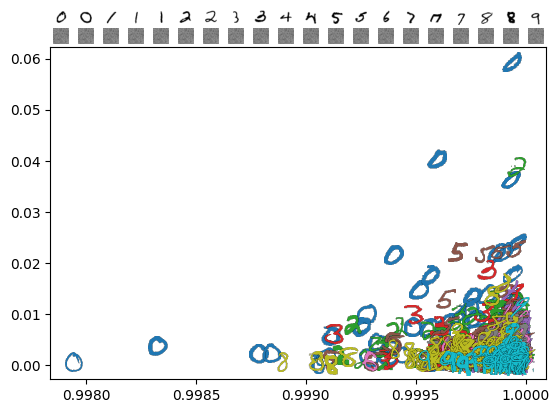

In [7]:
plot_digits_dimreduced_examples(X, Y, encoder)